### Feature Scaling (Multi-variable)

In [2]:
# imports
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [3]:
# loading data

def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

X_train, y_train = load_house_data()

# features
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

In [4]:
# linear regression with multiple variables related functions

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient (X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
   
    # An array to store cost J at each iteration primarily for graphing later
    J_history = []
    w0_hist = []
    b_hist = []
    
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    
    for i in range (num_iters):
        
        # calculate gradients
        dj_db, dj_dw = gradient_function (X, y, w, b)
        
        # update params using w, b, alpha & gradients
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000:
            J_history.append (cost_function(X, y, w, b))
            w0_hist.append (w[0])
            b_hist.append (b) 
            
        if i% math.ceil(num_iters/10) == 0:
            cst = J_history[i]
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")     
        
    
        
    return w, b, J_history, w0_hist, b_hist

# plotting cost vs iterations, cost vs w

def plot_cost_iter_w(J_hist, w0_hist):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    ax[0].plot(np.arange(0,len(J_hist), 1), J_hist)
    ax[0].set_title("Cost vs Iteration")
    ax[0].set_ylabel("Cost")
    ax[0].set_xlabel("iteration")
    
    
    ax[1].scatter(w0_hist, J_hist)
    ax[1].plot(w0_hist, J_hist)
    ax[1].set_title("Cost vs w[0]")
    ax[1].set_ylabel("Cost")
    ax[1].set_xlabel("w[0]")
    

### without feature scaling

 - notice below that djdw0 is significantly larger than djdw1, djdw2, djdw3 & djdb (in absolute value)
 - if we run below scenario for larger number of iterations, eventually values of derivates will become similar in value & range
 - this is because input features do not belong to similar range to begin with
 - it is possible that we can scale the input features to a similar range, that will make the derivatives similar in values as well, this will help gradient descent to converge faster (in less number of iterations) and make the algorithm much faste
 
 ![](img_fs_intuition.JPG)
 
 ![](img_fs_obs.JPG)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.58690e+03  2.6e-01 -9.9e-05 -5.0e-04 -5.3e-02  5.7e-04 -1.4e+04 -2.0e+01 -5.5e+00  2.8e+02 -1.4e+01
      200 1.51091e+03  2.6e-01 -6.4e-04 -1.2e-03 -1.1e-01  1.0e-03 -3.9e+02  4.9e+00  7.8e+00  5.6e+02 -5.1e+00
      300 1.48390e+03  2.6e-01 -1.1e-03 -2.0e-03 -1.6e-01  1.4e-03 -2.2e+01  5.2e+00  8.1e+00  5.2e+02 -5.1e+00
      400 1.46102e+03  2.6e-01 -1.6e-03 -2.7e-03 -2.0e-01  1.9e-03 -1.2e+01  4.8e+00  8.0e+00  4.8e+02 -5.3e+00
      500 1.44160e+03  2.6e-01 -2.0e-03 -3.4e-03 -2.4e-01  2.4e-03 -1.1e+01  4.4e+00  8.0e+00  4.5e+02 -5.5e+00
      600 1.42513e+03  2.6e-01 -2.4e-03 -4.1e-03 -2.8e-01  2.9e-03 -9.7e+00  4.1e+00  7.9e+00  4.1e+02 -

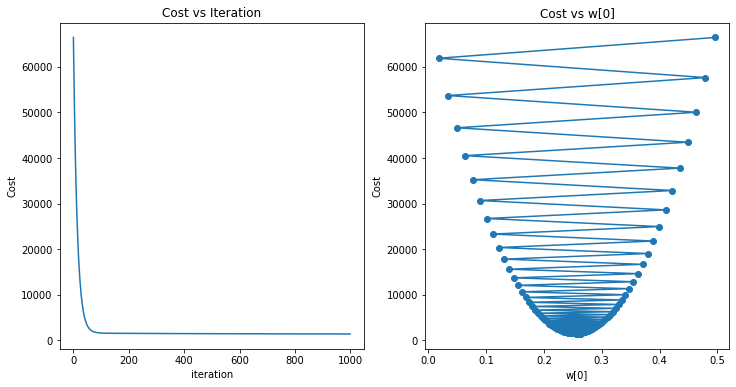

In [29]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 1000

# setting alpha to 9e-7
alpha = 9e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

### feature scaling techniques

![](img_fs_tecqs.JPG)

![](img_fs_zscore_norm.JPG)

In [6]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    
    # mean
    mu = np.mean(X, axis=0)
    
    # standard deviation
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/sigma
    
    return (X_norm, mu, sigma)

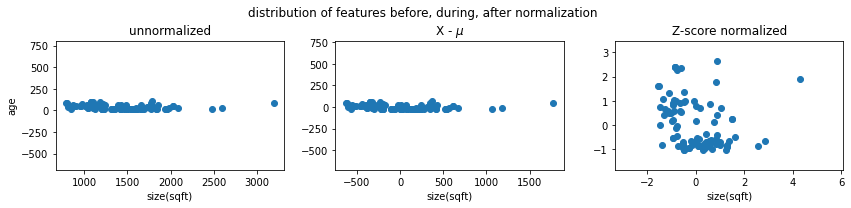

In [7]:
# visualizing data after z-score normalization

mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

### observations

![](img_fs_norm_visual.JPG)

In [8]:
# normalizing all original input features

X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

print(f"X_mu (mean) = {X_mu}, \nX_sigma (standard deviation) = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu (mean) = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma (standard deviation) = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### observations

 - note that peak to peak values are much closer in the case of normalized features (reduced from factor of 1000s to 2-3)


In [20]:
# visualizing all features before & after normalization

In [21]:
from scipy.stats import norm

c:\python38\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


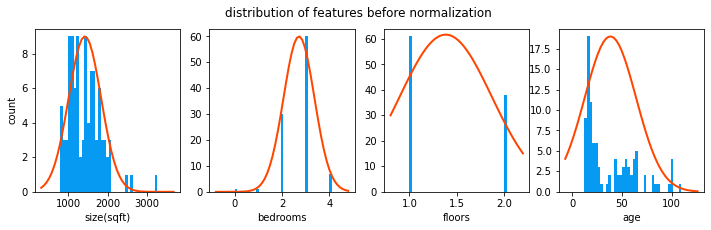

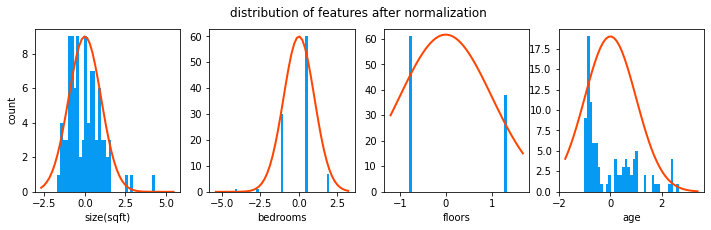

In [27]:
# before nomalization
fig,ax=plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    data = X_train[:, i]
    
    # histogram     
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax[i].hist(data, x, color="xkcd:azure")
    ax[i].set_xlabel(X_features[i])

    # normal distribution
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax[i].twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')
    
  
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()

# after nomalization
fig,ax=plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    data = X_norm[:, i]
    
    # histogram     
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax[i].hist(data, x, color="xkcd:azure")
    ax[i].set_xlabel(X_features[i])

    # normal distribution
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax[i].twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')
    
  
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")
plt.show()

### observations

 - the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.

### Running Gradient Descent With Normalized Data

compare GD convergence with / without normalization
 - without normalization - very small learning rate
 - with normalization - larger learning rate

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.58690e+03  2.6e-01 -9.9e-05 -5.0e-04 -5.3e-02  5.7e-04 -1.4e+04 -2.0e+01 -5.5e+00  2.8e+02 -1.4e+01
      200 1.51091e+03  2.6e-01 -6.4e-04 -1.2e-03 -1.1e-01  1.0e-03 -3.9e+02  4.9e+00  7.8e+00  5.6e+02 -5.1e+00
      300 1.48390e+03  2.6e-01 -1.1e-03 -2.0e-03 -1.6e-01  1.4e-03 -2.2e+01  5.2e+00  8.1e+00  5.2e+02 -5.1e+00
      400 1.46102e+03  2.6e-01 -1.6e-03 -2.7e-03 -2.0e-01  1.9e-03 -1.2e+01  4.8e+00  8.0e+00  4.8e+02 -5.3e+00
      500 1.44160e+03  2.6e-01 -2.0e-03 -3.4e-03 -2.4e-01  2.4e-03 -1.1e+01  4.4e+00  8.0e+00  4.5e+02 -5.5e+00
      600 1.42513e+03  2.6e-01 -2.4e-03 -4.1e-03 -2.8e-01  2.9e-03 -9.7e+00  4.1e+00  7.9e+00  4.1e+02 -

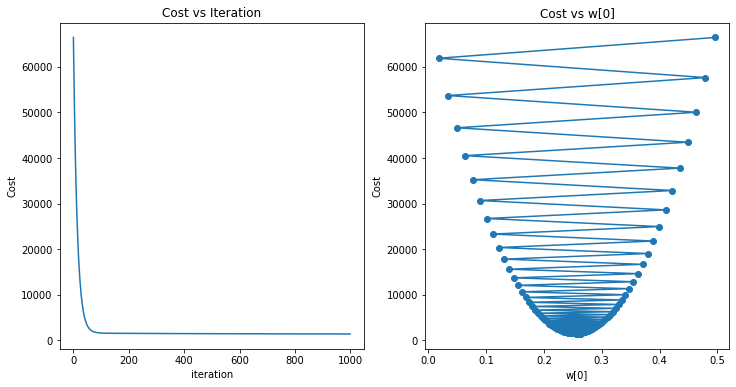

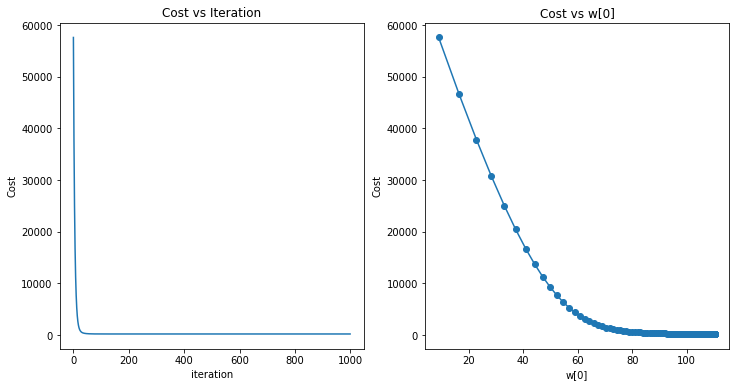

In [40]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 1000

# setting alpha to 9e-7
alpha = 9e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 1000

# setting alpha to 1.0e-1 to speed up GD converge
alpha = 1.0e-1

w_norm, b_norm, J_hist_norm, w0_hist_norm, b_hist_norm = gradient_descent(X_norm, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist_norm, w0_hist_norm)

### observations

 - GD converges much faster (less number of iterations) with normalized data even though learning rate for normalized one is almost 10^6 times bigger compared to non - normalized data
 - Even with larger alpha for normalized GD, cost vs w[0] plot does not oscillate and djdw0 (gradient) maintains it's -ve sign throughout

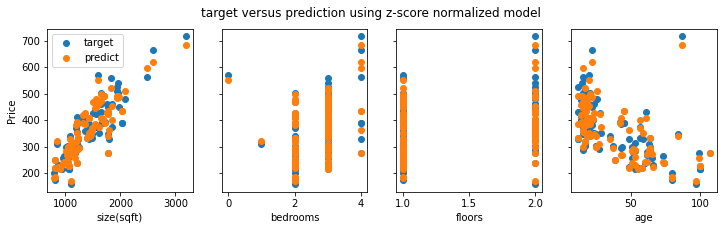

In [42]:
# predict target using normalized features

m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm


# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)

for i in range(len(ax)):
    
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].scatter(X_train[:,i], yp, label = 'predict')

ax[0].set_ylabel("Price"); 
ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

### observations

 - for multiple features we need multiple plots to show results vs features
 - when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized

In [ ]:
# todo 